# Breast Cancer Detector: Predicting Malignancy with Machine Learning

The goal of this project is to build a binary classification model that predicts whether a breast tumor is benign or malignant based on a set of diagnostic features. Using machine learning techniques, the model aims to assist in early detection and diagnosis of breast cancer, improve screening accuracy, and reduce false positives and false negatives in medical assessments.

## Import required packages

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

## Load Data and run quick EDA

In [ ]:
df=pd.read_csv('data/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.shape 

(569, 32)

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.describe(include=object)

,diagnosis
count,569
unique,2
top,B
freq,357


In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [57]:
df.drop(['id'], axis=1, inplace=True) 
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


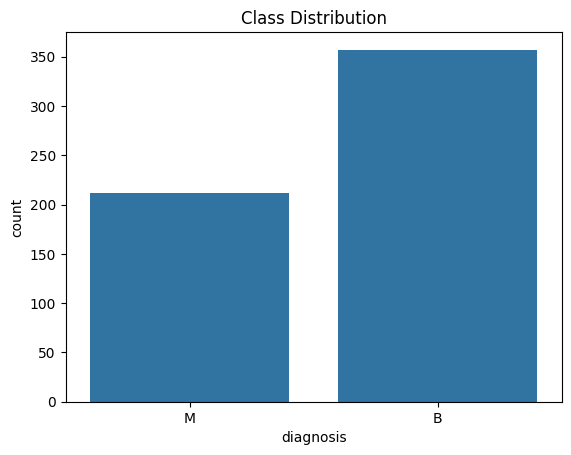

In [ ]:
print(df['diagnosis'].value_counts(normalize=True)) 
sns.countplot(x='diagnosis', data=df)
plt.title("Class Distribution")
plt.show()

In [63]:
corr_matrix = df.select_dtypes(include='number').corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 4: Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

df_reduced = df.drop(columns=to_drop)

print("Dropped due to high correlation:", to_drop)

Dropped due to high correlation: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


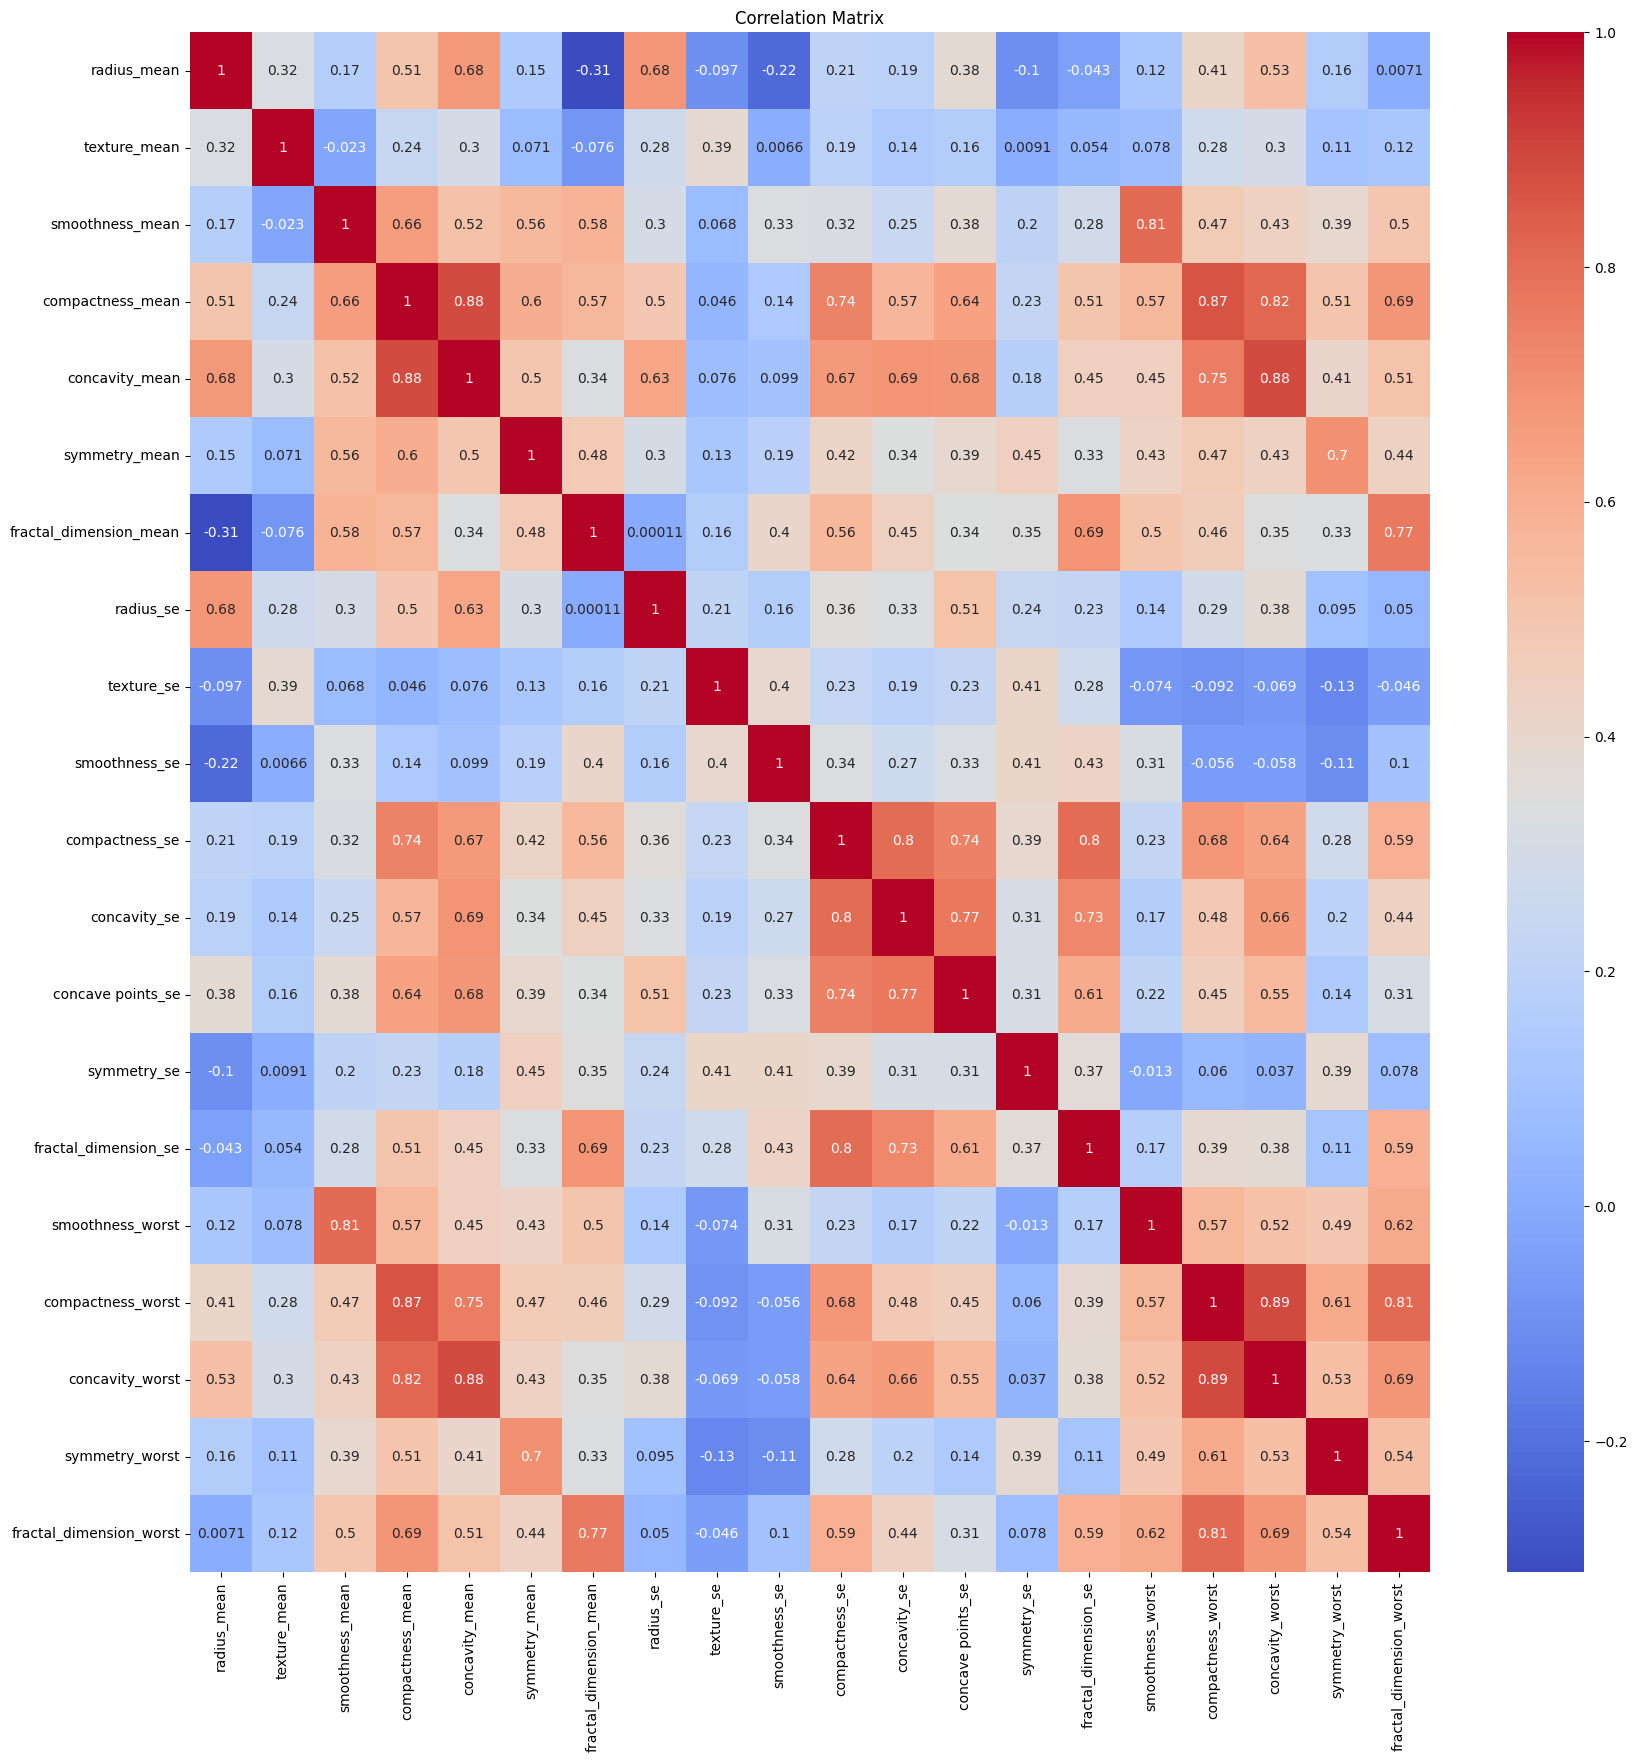

In [65]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_reduced.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

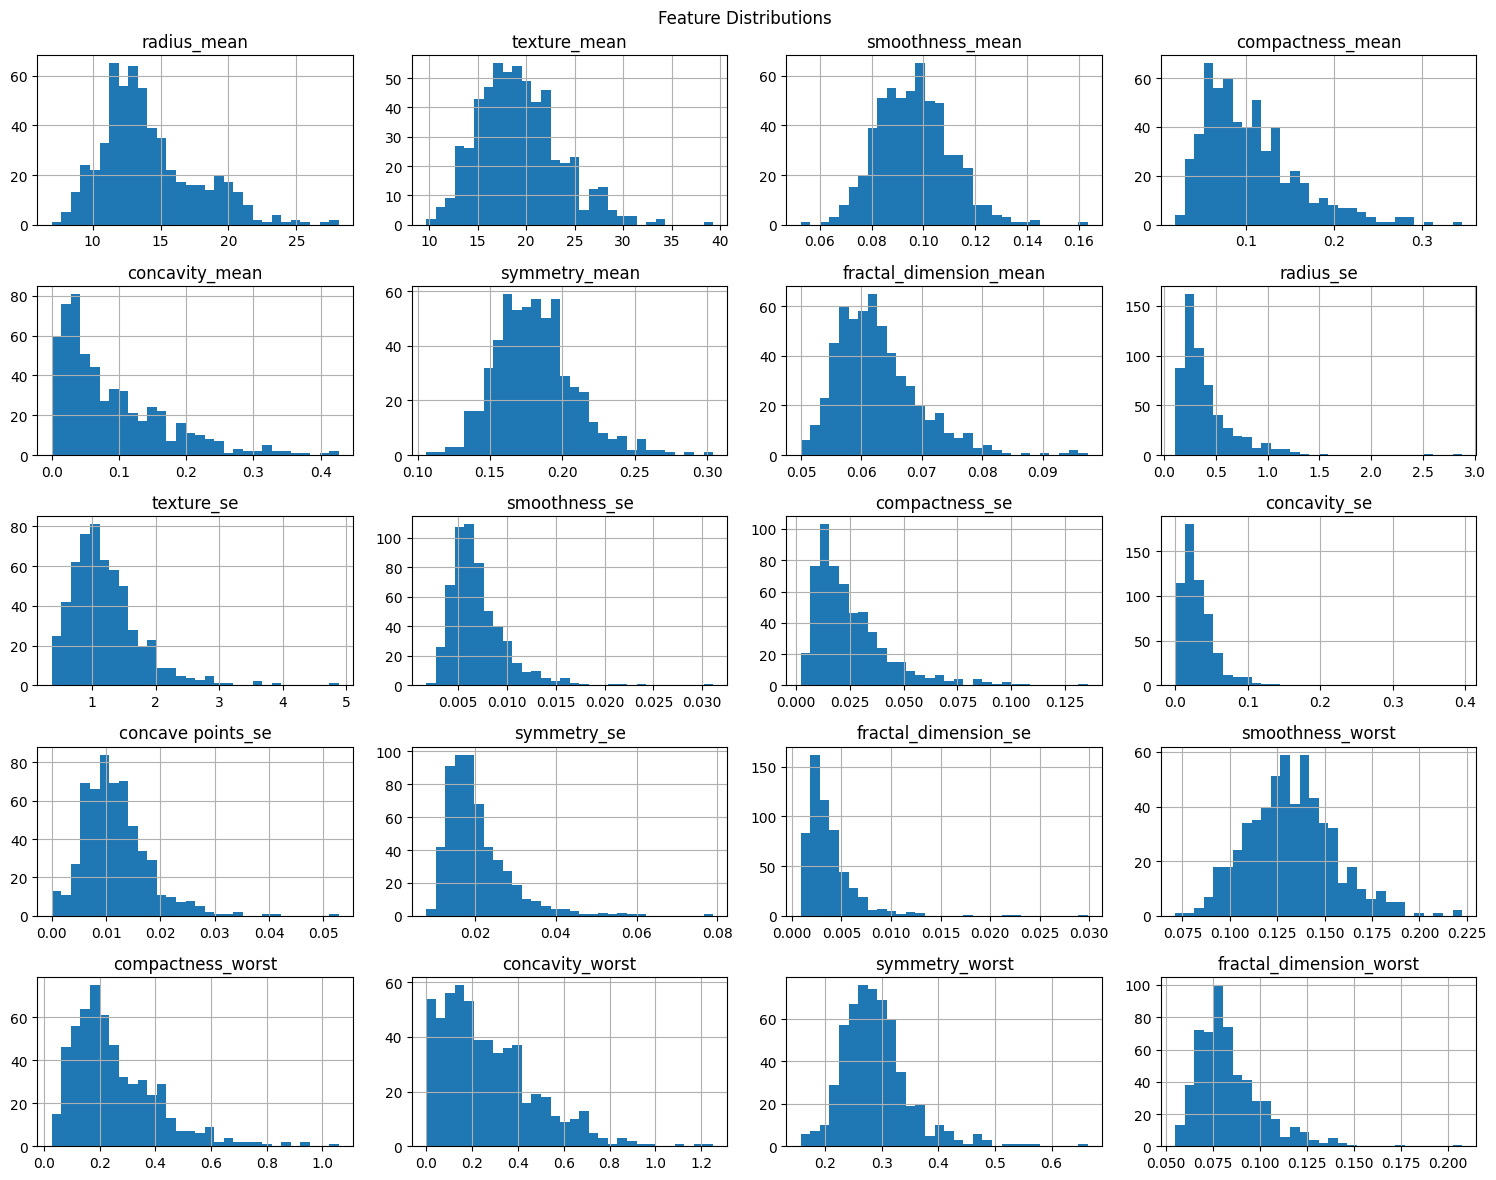

In [66]:
df_reduced.hist(figsize=(15, 12), bins=30)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

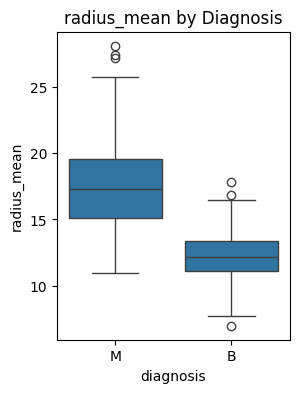

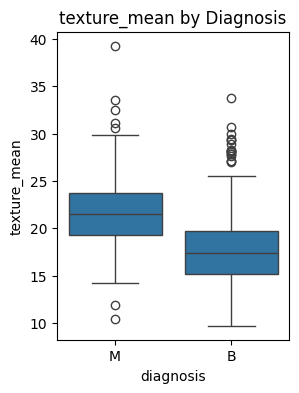

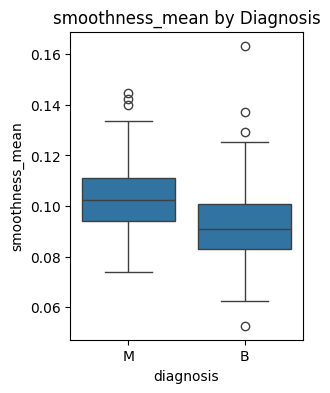

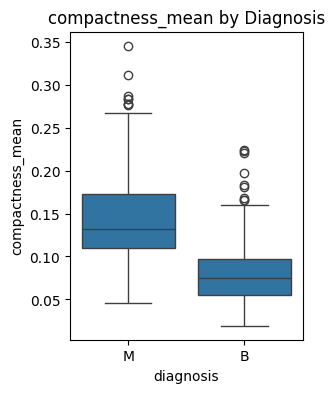

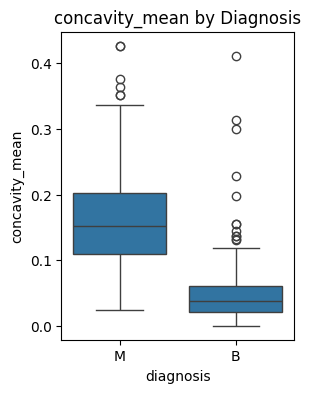

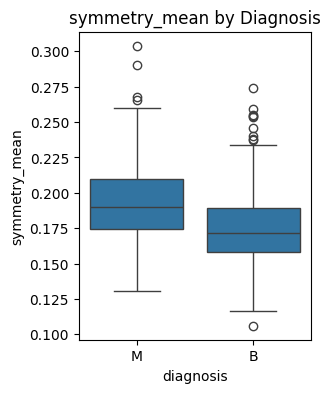

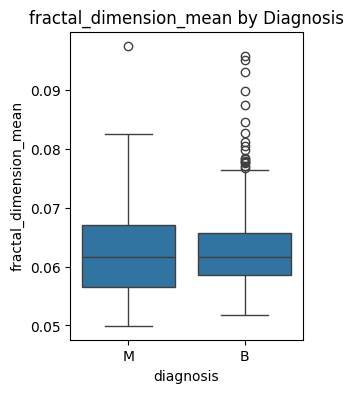

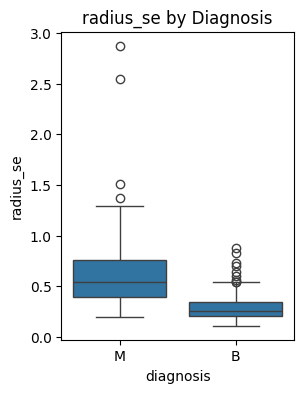

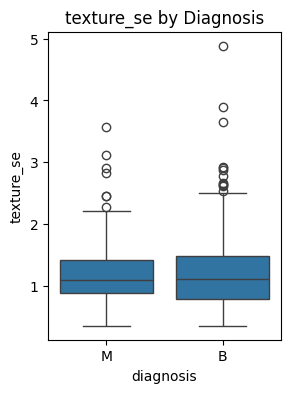

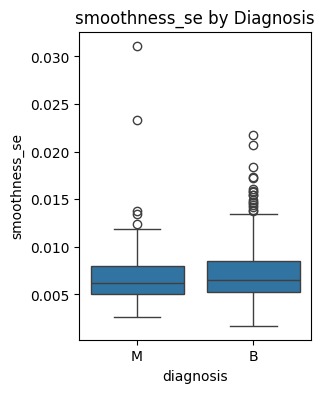

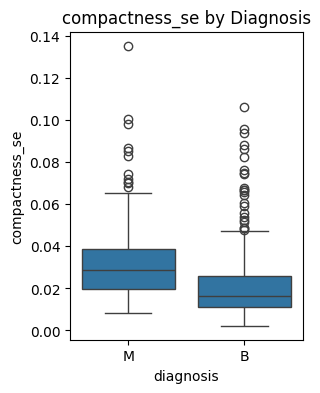

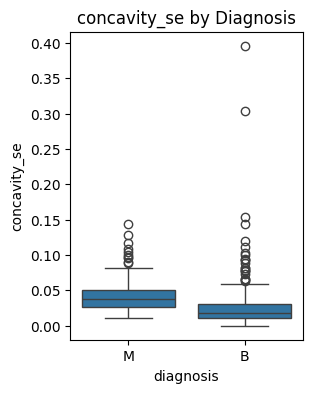

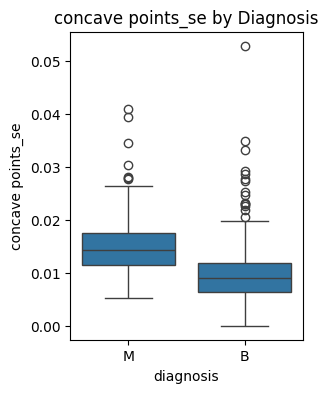

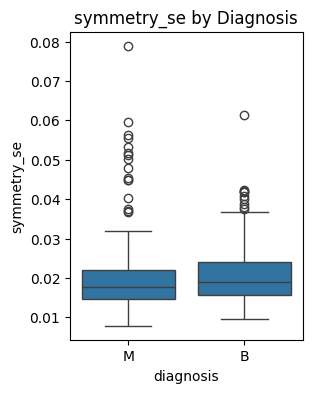

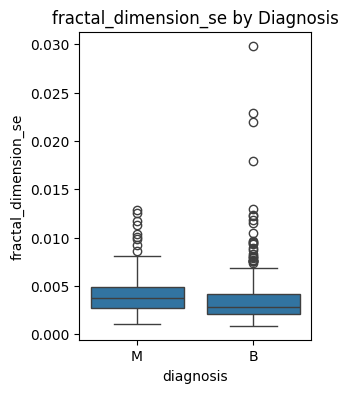

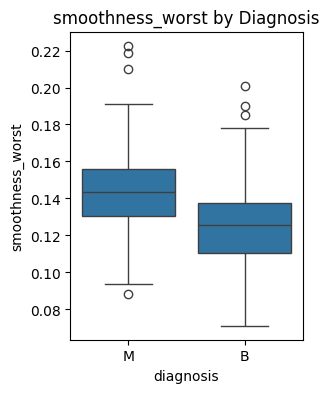

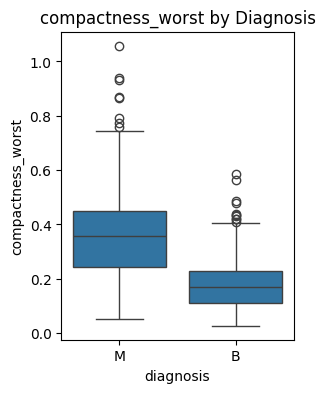

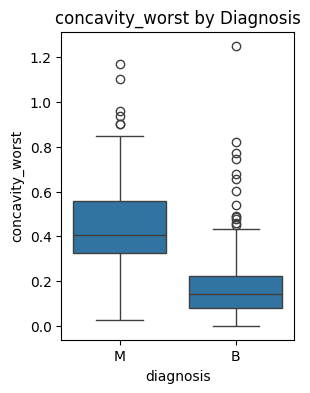

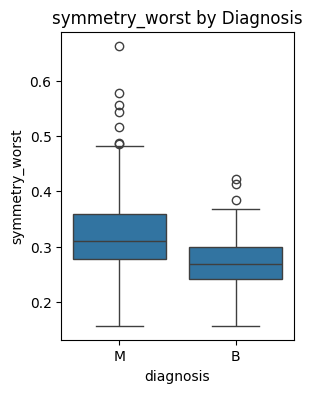

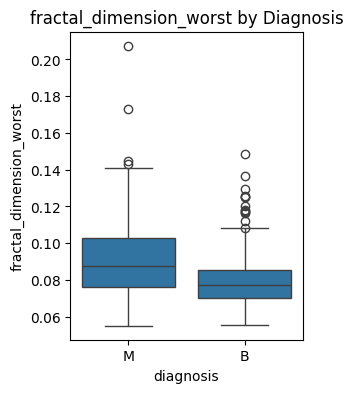

In [67]:
for col in df_reduced.select_dtypes(include=np.number).columns[:]:  
    plt.figure(figsize=(3, 4))
    sns.boxplot(x='diagnosis', y=col, data=df_reduced)
    plt.title(f'{col} by Diagnosis')
    plt.show()

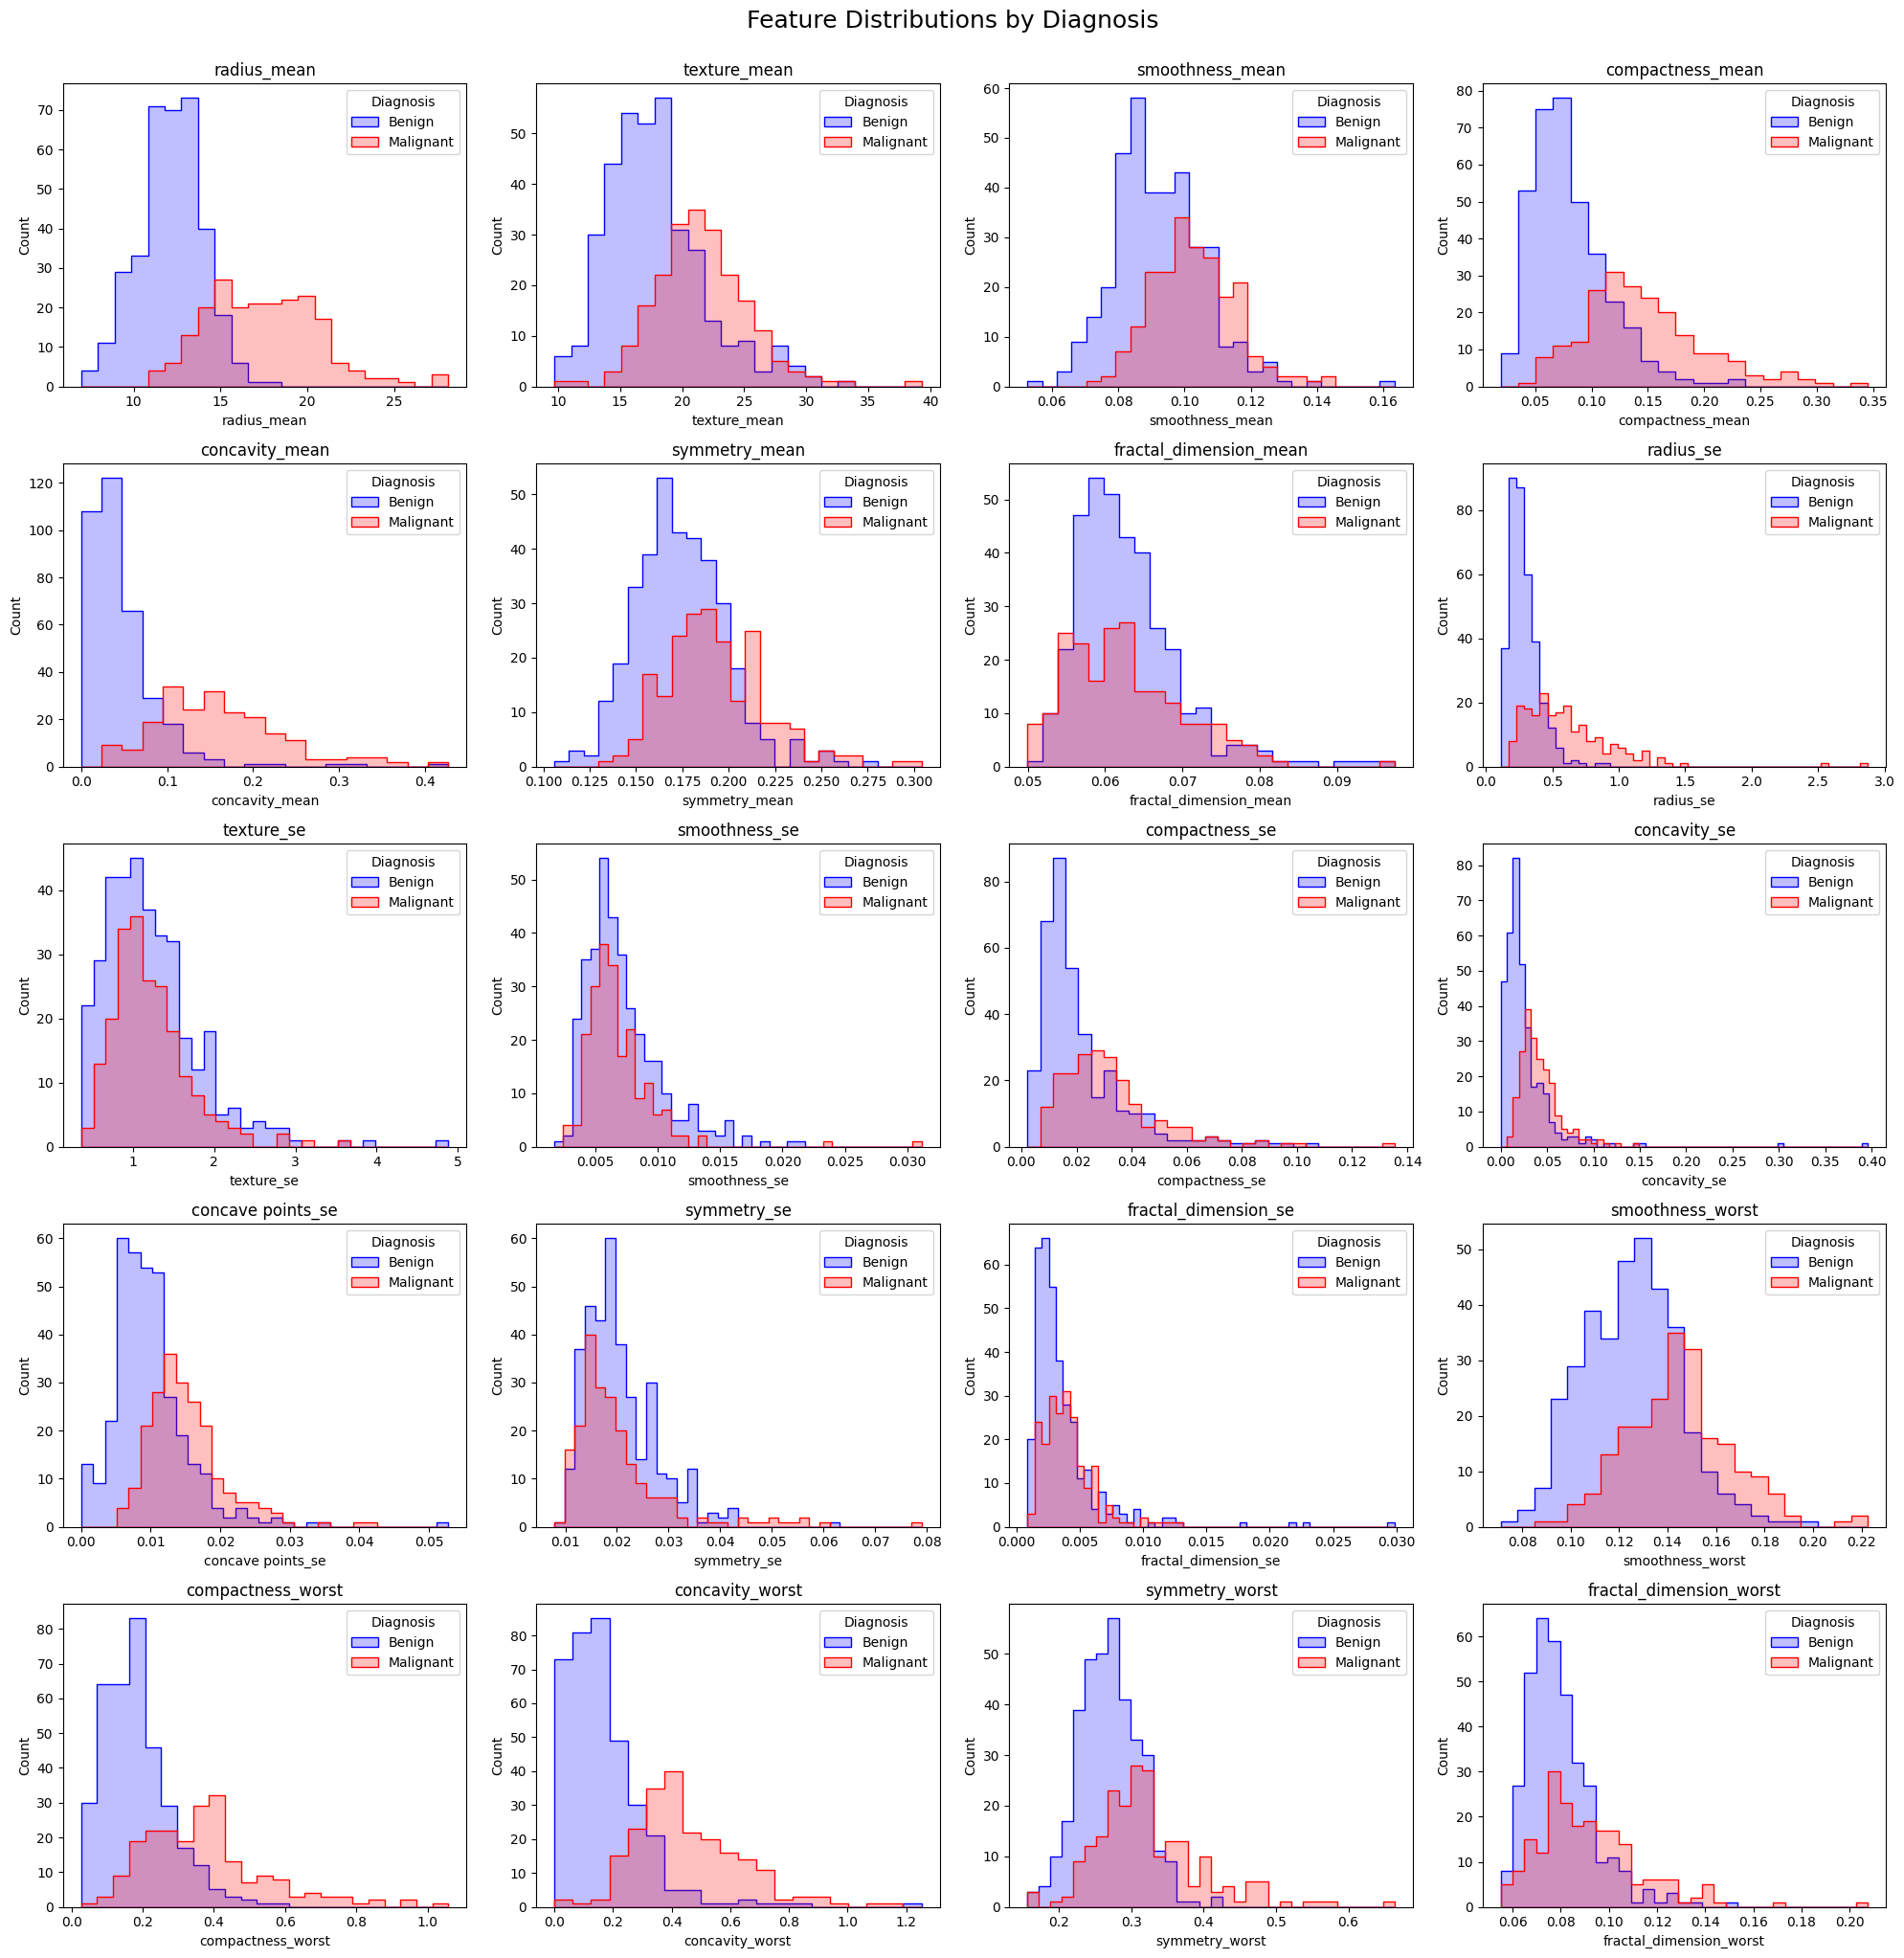

In [68]:

cols = df_reduced.select_dtypes(include='number').columns[:] 
n_cols = 4  
n_plots = len(cols)
n_rows = (n_plots + n_cols - 1) // n_cols  

plt.figure(figsize=(5 * n_cols, 4 * n_rows), facecolor='white')

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df_reduced, x=col, hue='diagnosis', element='step',
                 palette={'B': 'blue', 'M': 'red'}, kde=False)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])

plt.tight_layout()
plt.suptitle("Feature Distributions by Diagnosis", fontsize=18, y=1.02)
plt.show()

## LogisticRegression

In [53]:
import statsmodels.api as sm

In [69]:

X = df_reduced.drop(['diagnosis'], axis=1)
X = sm.add_constant(X)
y = (df['diagnosis'] == 'M').astype(int)

model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      548
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27.918
Date:                Thu, 26 Jun 2025   Deviance:                       55.836
Time:                        20:28:07   Pearson chi2:                     140.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7055
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Probability of Malignant